In [1]:
library(Deriv)

In [2]:
n <- 100
betas <- rbeta(n,5,1)

In [3]:
betas[1:5]

[1] 0.8318346 0.9980753 0.8523696 0.8047775 0.8998629

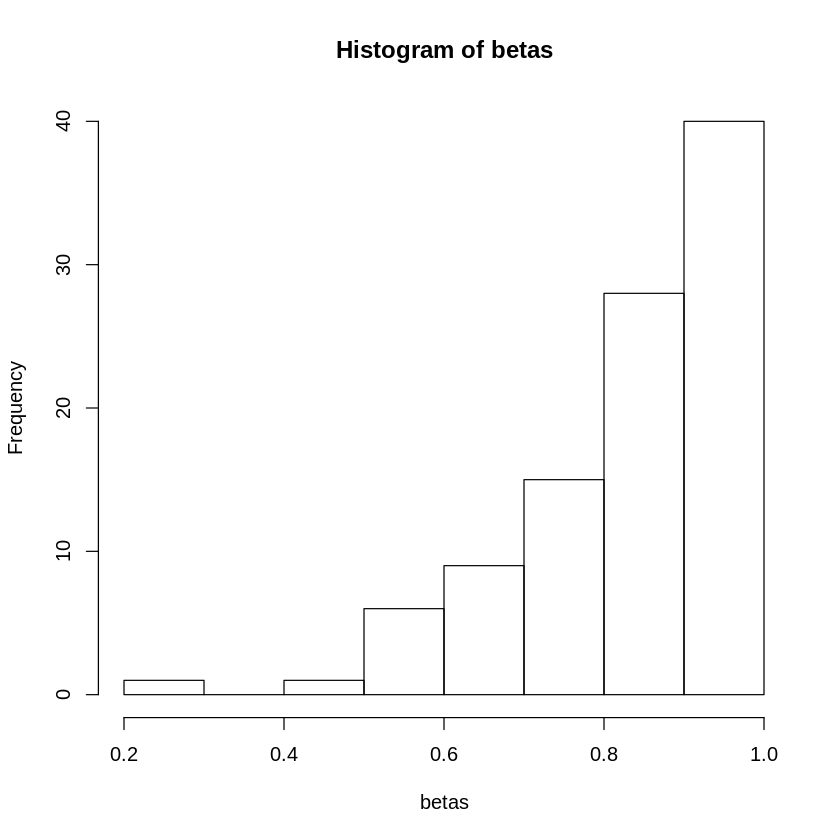

In [4]:
hist(betas)

In [25]:
sal <- function(a,b,c,d,y){
    a + b*sinh(c*asinh(y) + d)
    }
# sal = expression(a + b*sinh(c*asinh(y)+d))
drule[["asinh"]] <- alist(x=1/sqrt(x^2+1))

d_sal = Deriv(sal,"y")

# negative log likelihood function
# https://stackoverflow.com/questions/20479315/optim-function-argument-missing
# Optimize mean and covariance too!!!
nllf <- function(v,y){
    a <- v[5]
    b <- v[6]
    c <- v[7]
    d <- v[8]
    return(-sum(log(d_sal(a,b,c,d,y))))
    }


In [26]:
d_sal

function (a, b, c, d, y) 
b * c * cosh(c * asinh(y) + d)/sqrt(1 + y^2)

In [7]:
#log likelihood
# L = -1/2log|C|-1/2(y-\mu)C^{-1}(y-\mu)+\sum log \partial \phi(yi)/\partial yi - N/2 log2\pi

In [27]:
o = optim(par=c(0.5,0.5,0.5,0.5),fn=nllf,)
o

ERROR: Error in d_sal(a, b, c, d, y): argument "y" is missing, with no default


In [ ]:
par = o$par

In [ ]:
hist(sal(par[1],par[2],par[3],par[4],betas))